In [10]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

with MPRester("f8gAbZFioEswIMUD") as m:

    structure = m.get_structure_by_material_id("mp-961646")
    bandcris = m.get_bandstructure_by_material_id("mp-961646")#structure de la bande de cristale
    BSplot = BSPlotter(bandcris)#pour pouvoir afficher le graphe
    Data = BSplot.bs_plot_data()#récupération des data

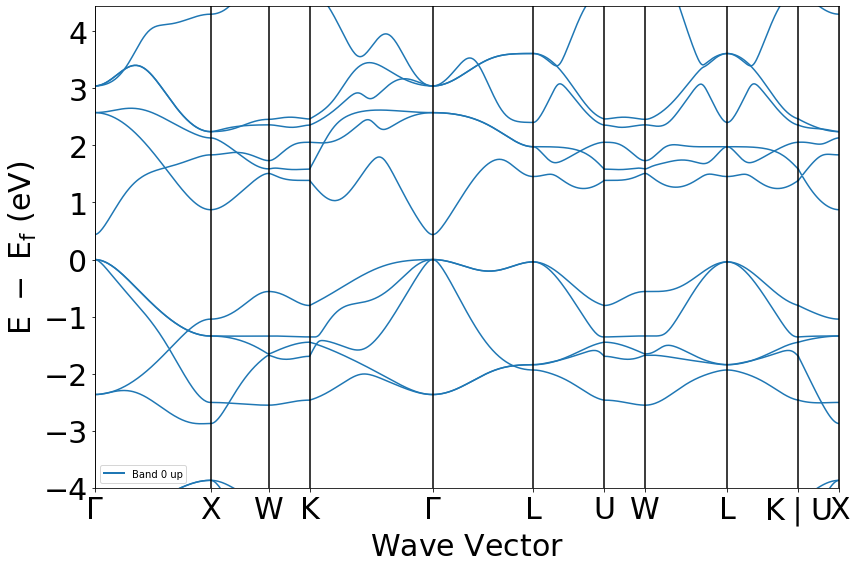

In [11]:
BSplot.show()

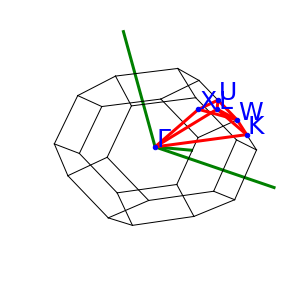

In [12]:
BSplot.plot_brillouin()

## Bande interdite

In [13]:
BI = bandcris.get_band_gap()
print(BI)


{'direct': True, 'energy': 0.4377000000000004, 'transition': '\\Gamma-\\Gamma'}


In [14]:
%%html
<img src = "bande_interdit.jpg">

Il s'agit d'une bande directe, cela signifie que le maximum de la dernière bande de valence est aligné avec le minimum de la première bande de conduction. Cela est très facilement vérifiable sur le graphe ci-dessus.
Il y a simplement un échange de photon.

La bande interdite a une largeur de 0,44 eV et la transition se fait du kpoint Gamma au kpoint Gamma.

## Dispersion de la dernière bande de valence

Pour déterminer les directions de dispersion dans la dernière bande de valence ainsi que la première bande de conduction,il est nécessaire de trouver la pente dont la valeur absolue est la plus élevée ainsi que la plus faible.

In [15]:
ticks = Data.get('ticks')
distance = ticks.get('distance')
dist=Data.get('distance')
Wdistance = []
Energie = Data.get('energy')
for i in range(15):
    dist = distance[i+1]-distance[i]
    if dist not in Wdistance :
        if dist != 0:
            Wdistance.append(dist)

diff_E_c = []
pente_c = []

for band in range(len(Wdistance)):
    curr = Energie['1'][band][:][20]
    diff_E_c.append(curr[-1]-curr[0])

diff_E_v = []
pente_v = []

for band in range(len(Wdistance)):
    curr = Energie['1'][band][:][19]
    diff_E_v.append(curr[-1]-curr[0])
 
    
for i in range(len(Wdistance)):
    pente_c.append(abs(diff_E_c[i]/Wdistance[i]))
    pente_v.append(abs(diff_E_v[i]/Wdistance[i]))

max_pente_c = max(pente_c)
min_pente_c = min(pente_c)
max_pente_v = max(pente_v)
min_pente_v = min(pente_v)
i_max_c = 0
i_min_c = 0
i_max_v = 0
i_min_v = 0

for i in range(len(pente_c)):
    if (pente_c[i] == max_pente_c):
        i_max_c = i
    if (pente_c[i] == min_pente_c):
        i_min_c = i      
for j in range(len(pente_v)):
    if (pente_v[j] == max_pente_v):
        i_max_v = j
    if (pente_v[j] == min_pente_v):
        i_min_v = j
        

print("La pente maximale de conduction vaut",max_pente_c,"et se trouve à l'index :",i_max_c)
print(" ")
print("La pente minimale de conduction vaut",min_pente_c,"et se trouve à l'index :",i_min_c)
print(" ")
print("La pente maximale de valence vaut",max_pente_v,"et se trouve à l'index :",i_max_v)
print(" ")
print("La pente minimale valence :",min_pente_v,"et se trouve à l'index :",i_min_v)

La pente maximale de conduction vaut 3.3416569994423653 et se trouve à l'index : 2
 
La pente minimale de conduction vaut 0.6452036039613237 et se trouve à l'index : 4
 
La pente maximale de valence vaut 1.8403060573754664 et se trouve à l'index : 5
 
La pente minimale valence : 0.018054002573661354 et se trouve à l'index : 6


In [16]:
%%html
<img src = "max-min.jpg">

Sur l'image ci-dessus nous pouvons voir la représentation du maximum et du minimum de valence(max val et min val) ainsi que le maximum et le minimum de conduction (min cond et max cond). Cette vérification graphique permet de s'assurer de la justesse des résultats obtenus précédemment.

On peut donc conclure que la direction de dispersion maximale de la bande de valence est la direction L-U. Tandis que la direction avec le moins de dispersion est la direction U-W.

Pour la bande de conduction la direction de dispersion minimale se trouve entre les k-points W et K et la direction de dispestion maximale entre Gamma et L.

## Masse effective

Si l'on suppose une dispersion parabolique, l'équation de la masse éffective $m^*$ s'écrit sous la forme:
$m^* = \frac{\hbar^2}{\frac{\partial^2 E}{\partial k^2}}$
où $\hbar$ est la constante de Planck qui vaut 1,054571817E-34J.s.
Etant donné que la dispersion est supposée parabolique on peut écrire l'énerige tel que E(k) = ak²+bk+c. Il faut ensuite trouver la valeur de 'a' afin de connaitre la dérivée seconde de la dispertion. Pour trouver cela on utilise les différents points caractérisitiques trouvés précédemment. Il est nottament nécessaire de connaitre la valeur de l'énergie maximale pour la dernière bande de valence ainsi que la valeur minimale de l'énergie pour la première bande de conduction.


<img src = "masse_effectiv.jpg">

Je n'ai malheureusement trouvé aucune solution satisfaisante pour la masse éffective(probablement une erreur d'interpolation). J'ai donc tracé les paraboles selon ce qui me semblait le plus logique.